<a href="https://colab.research.google.com/github/Manisharout/My_Projects/blob/main/Key_Point_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset link: https://www.robots.ox.ac.uk/~vgg/data/flowers/17/

Q3: Implement and evaluate the performance of two keypoint detection algorithms on a subset of the [Dataset: Oxford Flowers17 dataset]. Specifically, compare the performance of SIFT (Scale-Invariant Feature Transform) and ORB (Oriented FAST and Rotated BRIEF) in detecting keypoints and matching them between two images of the same flower (with small variations such as rotation or scale change, but without significant occlusion). Evaluate the algorithms in terms of (i) the number of keypoints detected (ii) computation time, and (iii) the quality of the matching (using a suitable matching metric, e.g., ratio test). Explain your findings clearly in your report with any observations about where performance is more or less efficient depending upon images chosen or dataset subset utilized.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving image_0007.jpg to image_0007 (1).jpg
Saving image_0008.jpg to image_0008 (2).jpg
Saving image_0009.jpg to image_0009 (1).jpg
Saving image_0010.jpg to image_0010 (1).jpg
Saving image_0011.jpg to image_0011 (1).jpg
Saving image_0001.jpg to image_0001 (2).jpg
Saving image_0002.jpg to image_0002 (3).jpg
Saving image_0003.jpg to image_0003 (1).jpg
Saving image_0004.jpg to image_0004 (1).jpg
Saving image_0005.jpg to image_0005 (1).jpg


SIFT: 421 keypoints detected in image1, 602 in image2
ORB: 500 keypoints detected in image1, 498 in image2
SIFT computation time: 0.29 seconds
ORB computation time: 0.01 seconds
SIFT: 15 good matches
ORB: 7 good matches


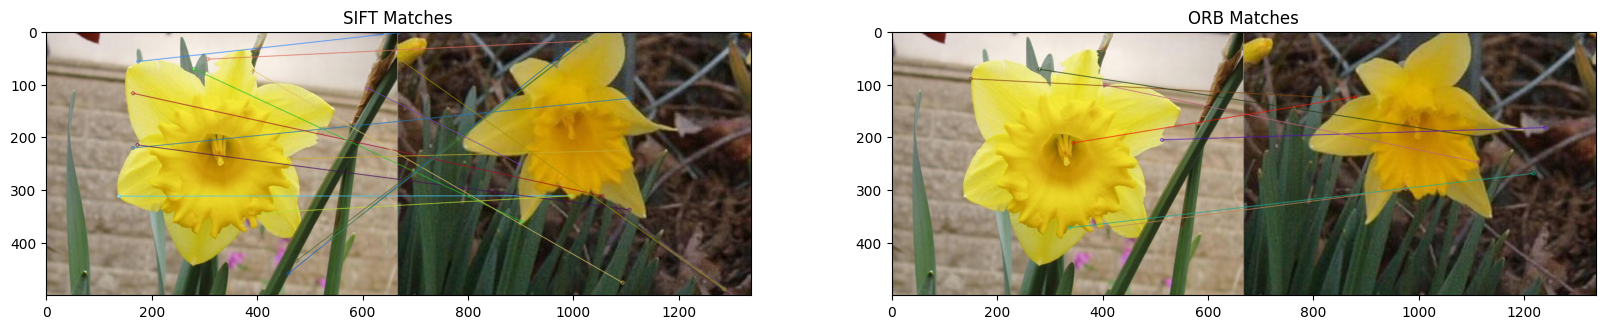

In [ ]:
import cv2
import time
import matplotlib.pyplot as plt

image1 = cv2.imread("image_0009.jpg", cv2.IMREAD_COLOR)
image2 = cv2.imread("image_0011.jpg", cv2.IMREAD_COLOR)

gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
orb = cv2.ORB_create()

start_time = time.time()
sift_kp1, sift_des1 = sift.detectAndCompute(gray1, None)
sift_kp2, sift_des2 = sift.detectAndCompute(gray2, None)
sift_time = time.time() - start_time

start_time = time.time()
orb_kp1, orb_des1 = orb.detectAndCompute(gray1, None)
orb_kp2, orb_des2 = orb.detectAndCompute(gray2, None)
orb_time = time.time() - start_time

bf = cv2.BFMatcher()

sift_matches = bf.knnMatch(sift_des1, sift_des2, k=2)

sift_good_matches = []
for m, n in sift_matches:
    if m.distance < 0.75 * n.distance:
        sift_good_matches.append(m)

orb_matches = bf.knnMatch(orb_des1, orb_des2, k=2)

orb_good_matches = []
for m, n in orb_matches:
    if m.distance < 0.75 * n.distance:
        orb_good_matches.append(m)

sift_matched_img = cv2.drawMatches(
    image1, sift_kp1, image2, sift_kp2, sift_good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)
orb_matched_img = cv2.drawMatches(
    image1, orb_kp1, image2, orb_kp2, orb_good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

print(f"SIFT: {len(sift_kp1)} keypoints detected in image1, {len(sift_kp2)} in image2")
print(f"ORB: {len(orb_kp1)} keypoints detected in image1, {len(orb_kp2)} in image2")
print(f"SIFT computation time: {sift_time:.2f} seconds")
print(f"ORB computation time: {orb_time:.2f} seconds")
print(f"SIFT: {len(sift_good_matches)} good matches")
print(f"ORB: {len(orb_good_matches)} good matches")

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title("SIFT Matches")
plt.imshow(cv2.cvtColor(sift_matched_img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title("ORB Matches")
plt.imshow(cv2.cvtColor(orb_matched_img, cv2.COLOR_BGR2RGB))
plt.show()